In [2]:
import numpy as np

import matplotlib.pylab as pyb
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


### 加载数据，数据降维（画图）

In [12]:
X,y = datasets.load_iris(True)
# 4个属性，4维空间，4维的数据
# 150代表样本的数量
X.shape

(150, 4)

In [13]:
# 降维，切片：简单粗暴方式（信息量变少了）
X = X[:,:2]
X.shape

(150, 2)

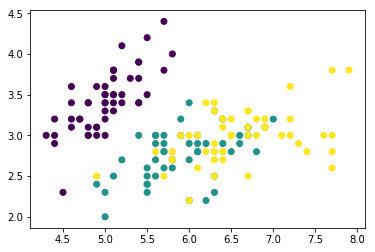

In [14]:
pyb.scatter(X[:,0],X[:,1],c = y)

### KNN算法训练数据

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

# 使用150个样本点作为训练数据
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
# 训练数据
X.shape
# 测试数据 shape (?,2)

(150, 2)

### meshgrid提取测试数据（8000个测试样本）

In [28]:
# 获取测试数据
# 横坐标4 ~ 8；纵坐标 2~ 4.5
# 背景点，取出来，meshgrid
x1 = np.linspace(4,8,100)

y1 = np.linspace(2,4.5,80)

X1,Y1 = np.meshgrid(x1,y1)

# X1 = X1.reshape(-1,1)
# Y1 = Y1.reshape(-1,1)
# X_test = np.concatenate([X1,Y1],axis = 1)
# X_test.shape

# 平铺，一维化，reshape
X_test = np.c_[X1.ravel(),Y1.ravel()]

X_test.shape

(8000, 2)

### 使用算法进行预测，可视化

In [35]:
%%time 
y_ = knn.predict(X_test)

Wall time: 258 ms


In [38]:
from matplotlib.colors import ListedColormap

In [43]:
lc = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])

lc2 = ListedColormap(['#FF0000','#00FF00','#0000FF'])

Wall time: 49.6 ms


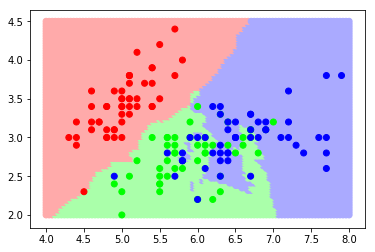

In [45]:
%%time
pyb.scatter(X_test[:,0],X_test[:,1],c = y_,cmap = lc)
pyb.scatter(X[:,0],X[:,1],c = y,cmap = lc2)

Wall time: 30.8 ms


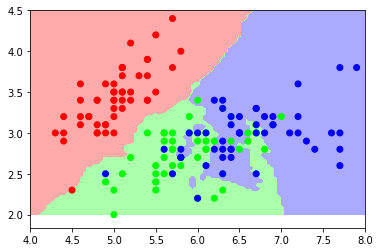

In [50]:
%%time
pyb.contourf(X1,Y1,y_.reshape(80,100),cmap = lc)

pyb.scatter(X[:,0],X[:,1],c = y,cmap = lc2)